## Manufacture equities price data, and correlated orders, in order to demonstrate BigQuery's ability to investigate flash trading. 


## Import libraries

In [ ]:
import random
import datetime
import pandas as pd
from google.cloud import bigquery
client = bigquery.Client()

## Generate timeseries data 

In [ ]:

def genTimestamp():
    dt = datetime.datetime(2022, 4, 25, 20, 59, 59)
    end = datetime.datetime(2022, 4, 25, 21, 59, 59)
    step = datetime.timedelta(seconds=1)
    result = []
    while dt < end:
        result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
        dt += step
    return dt

## Generate the dataframe with all data points with upward trend

In [202]:

def genDataframeInc():
    l = []
    m = []
    row = []
    result = []
    for i in range(0, 1800):
        row.append(i) #+1800
        l.append(round(random.uniform(13.01, 13.99),2))
        m.append(round(l[i]+random.uniform(0.01, 0.09),2))
    l.sort()
    m.sort()
    result = genTimestamp()
    df=pd.DataFrame(columns=['Row','Symbol','Timestamp','Bid_Price','Bid_Size','Ask_Price','Ask_Size'])
    for i in range(0, 1800):
        df = df.append({
                   'Row': str(row[i]),
                   'Symbol' : 'ABC', 
                   'Timestamp' : str(result[i]), 
                   'Bid_Price' : l[i], 
                   'Bid_Size' : '1', 
                   'Ask_Price' : m[i], 
                   'Ask_Size' : '1'}, ignore_index = True)
    return df

## Generate the dataframe with all data points with downward trend

In [ ]:

def genDataframeRev():
    l = []
    m = []
    row = []
    result = []
    for i in range(0, 1800):
        row.append(i) #+1800
        l.append(round(random.uniform(13.01, 13.99),2))
        m.append(round(l[i]+random.uniform(0.01, 0.09),2))
    # l.sort()
    # m.sort()
    l.sort(reverse=True)
    m.sort(reverse=True)
    result = genTimestamp()
    df=pd.DataFrame(columns=['Row','Symbol','Timestamp','Bid_Price','Bid_Size','Ask_Price','Ask_Size'])
    for i in range(0, 1800):
        df = df.append({
                   'Row': str(row[i]+1800),
                   'Symbol' : 'ABC', 
                   'Timestamp' : str(result[i+1800]), 
                   'Bid_Price' : l[i], 
                   'Bid_Size' : '1', 
                   'Ask_Price' : m[i], 
                   'Ask_Size' : '1'}, ignore_index = True)
    return df

In [205]:
df = genDataFrameInc()
####
# df = genDataFrameRev()
df.sample(5)

,Row,Symbol,Timestamp,Bid_Price,Bid_Size,Ask_Price,Ask_Size
1393,3193,ABC,2022-04-25 21:53:12,13.22,1,13.28,1
641,2441,ABC,2022-04-25 21:40:40,13.64,1,13.69,1
473,2273,ABC,2022-04-25 21:37:52,13.74,1,13.78,1
1319,3119,ABC,2022-04-25 21:51:58,13.26,1,13.31,1
1616,3416,ABC,2022-04-25 21:56:55,13.12,1,13.16,1


## Insert data into BQ

In [206]:

table_id = 'experiment-megha.strike_gts.nbbo_cpy'

job_config = bigquery.LoadJobConfig(
    schema=[
        bigquery.SchemaField("Row", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("Symbol", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("Timestamp", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("Bid_Price", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("Bid_Size", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("Ask_Price", bigquery.enums.SqlTypeNames.FLOAT),
        bigquery.SchemaField("Ask_Size", bigquery.enums.SqlTypeNames.STRING),
    ])

job = client.load_table_from_dataframe(
    df, table_id, job_config)  
job.result() 

LoadJob<project=experiment-megha, location=US, id=ef787798-1752-472c-ab2e-4f78bfb2d758>

## Build BQ models

Next step in building a model in Bigquery using the dataset just created. 

## BQML Overview

BigQuery ML enables data scientists and data analysts to build and operationalize ML models on planet-scale structured or semi-structured data, directly inside BigQuery, using simple SQL—in a fraction of the time. Export BigQuery ML models for online prediction into Vertex AI or your own serving layer.

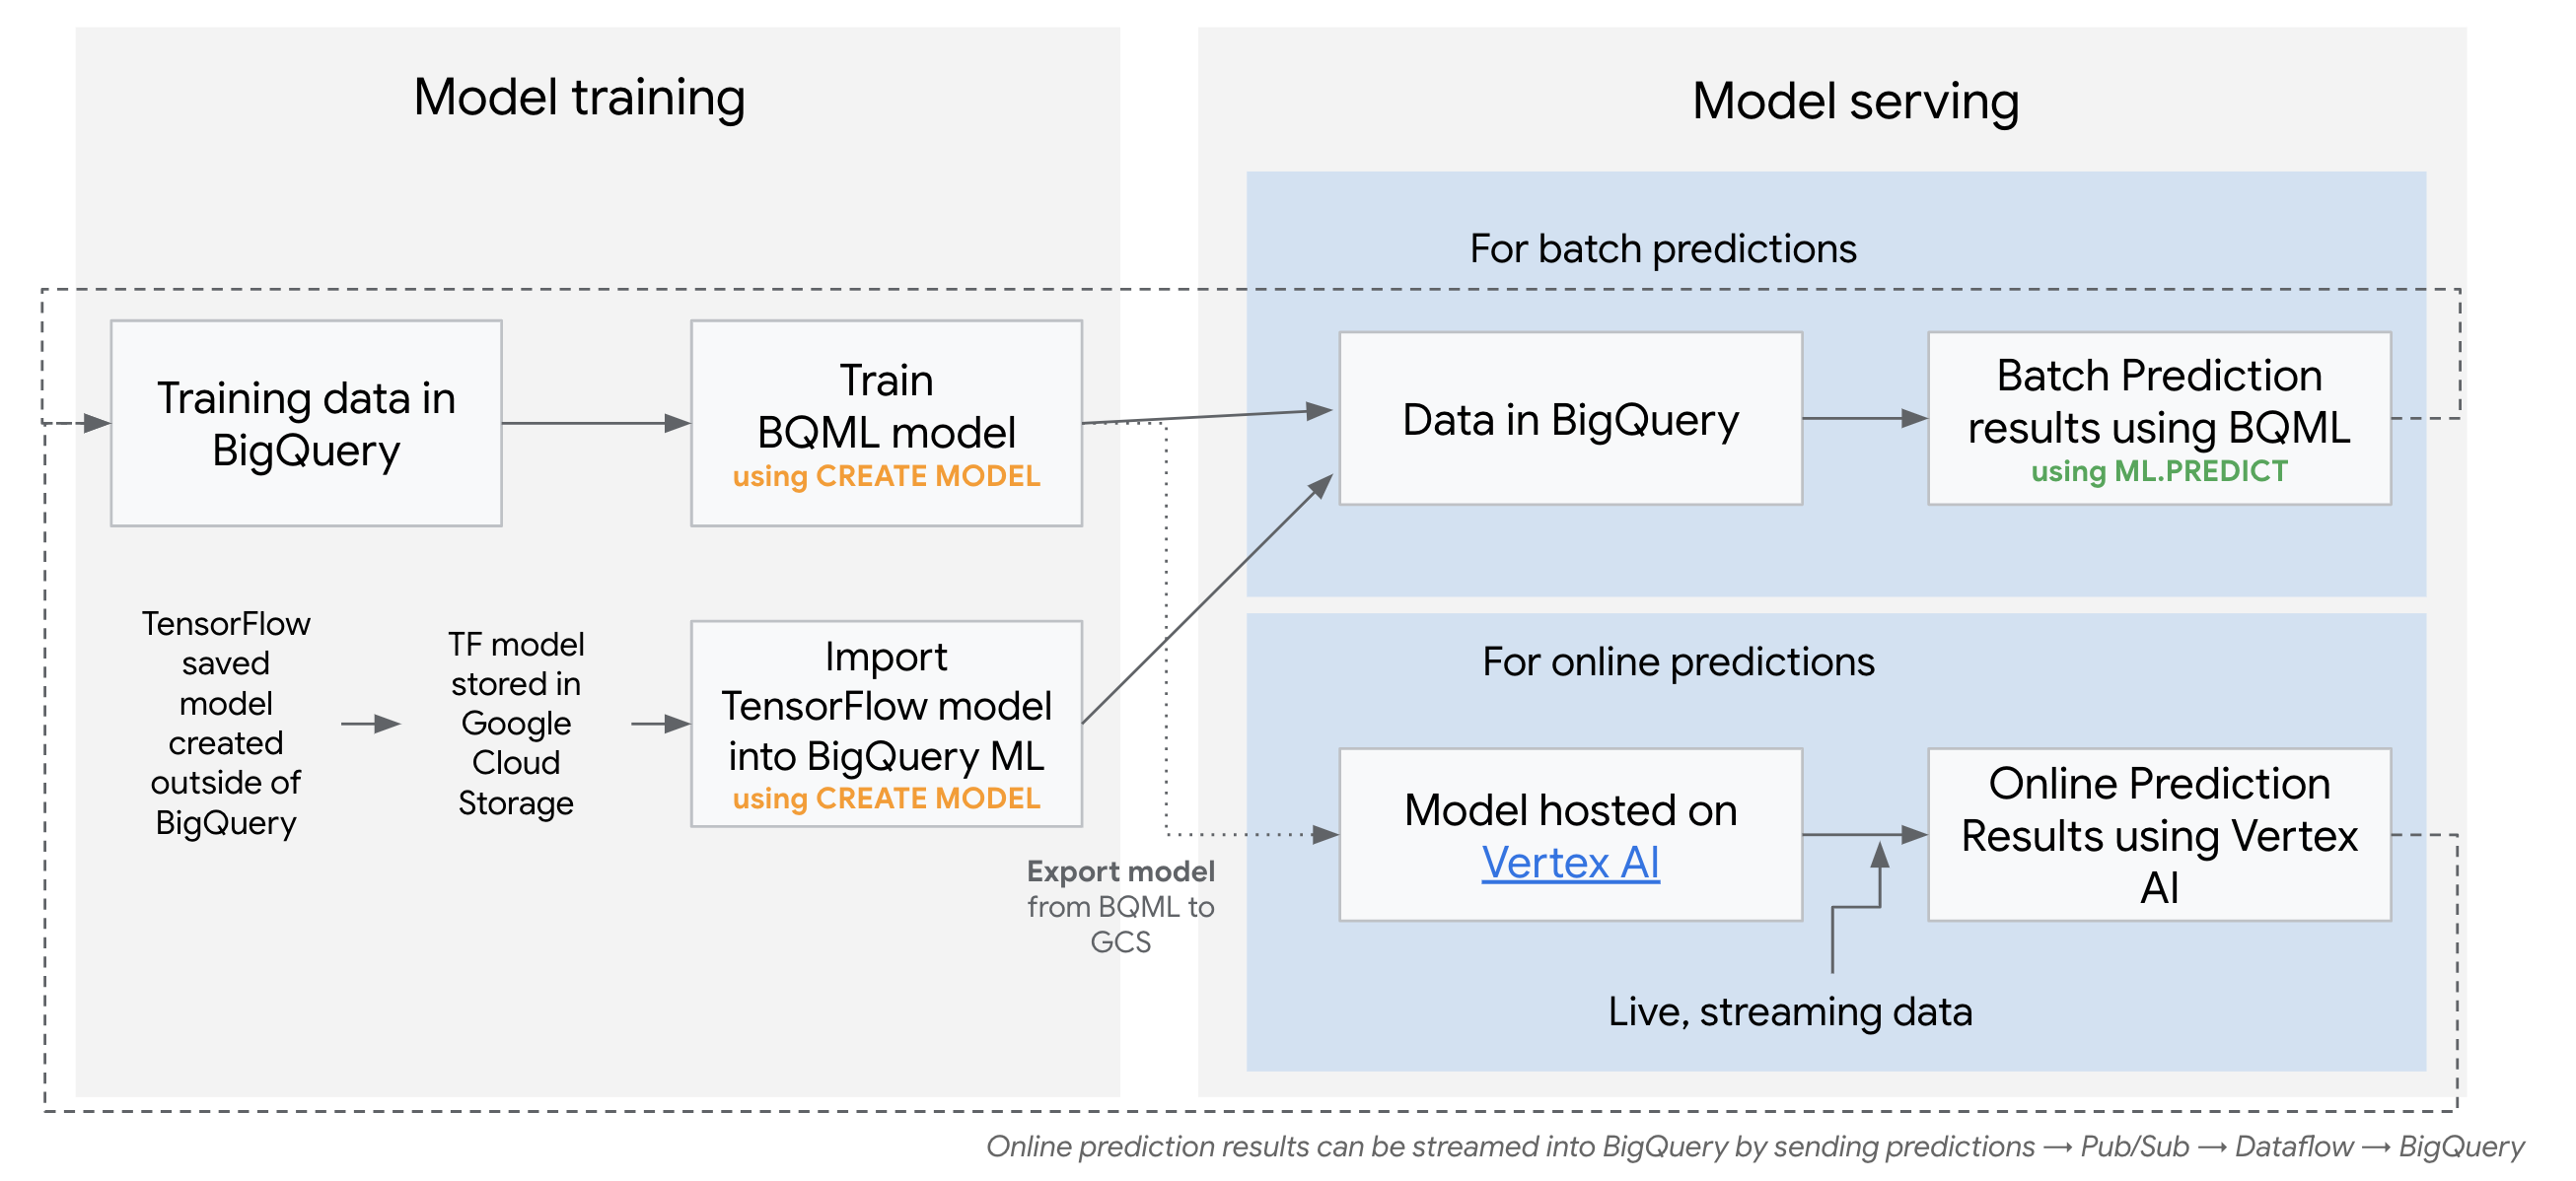

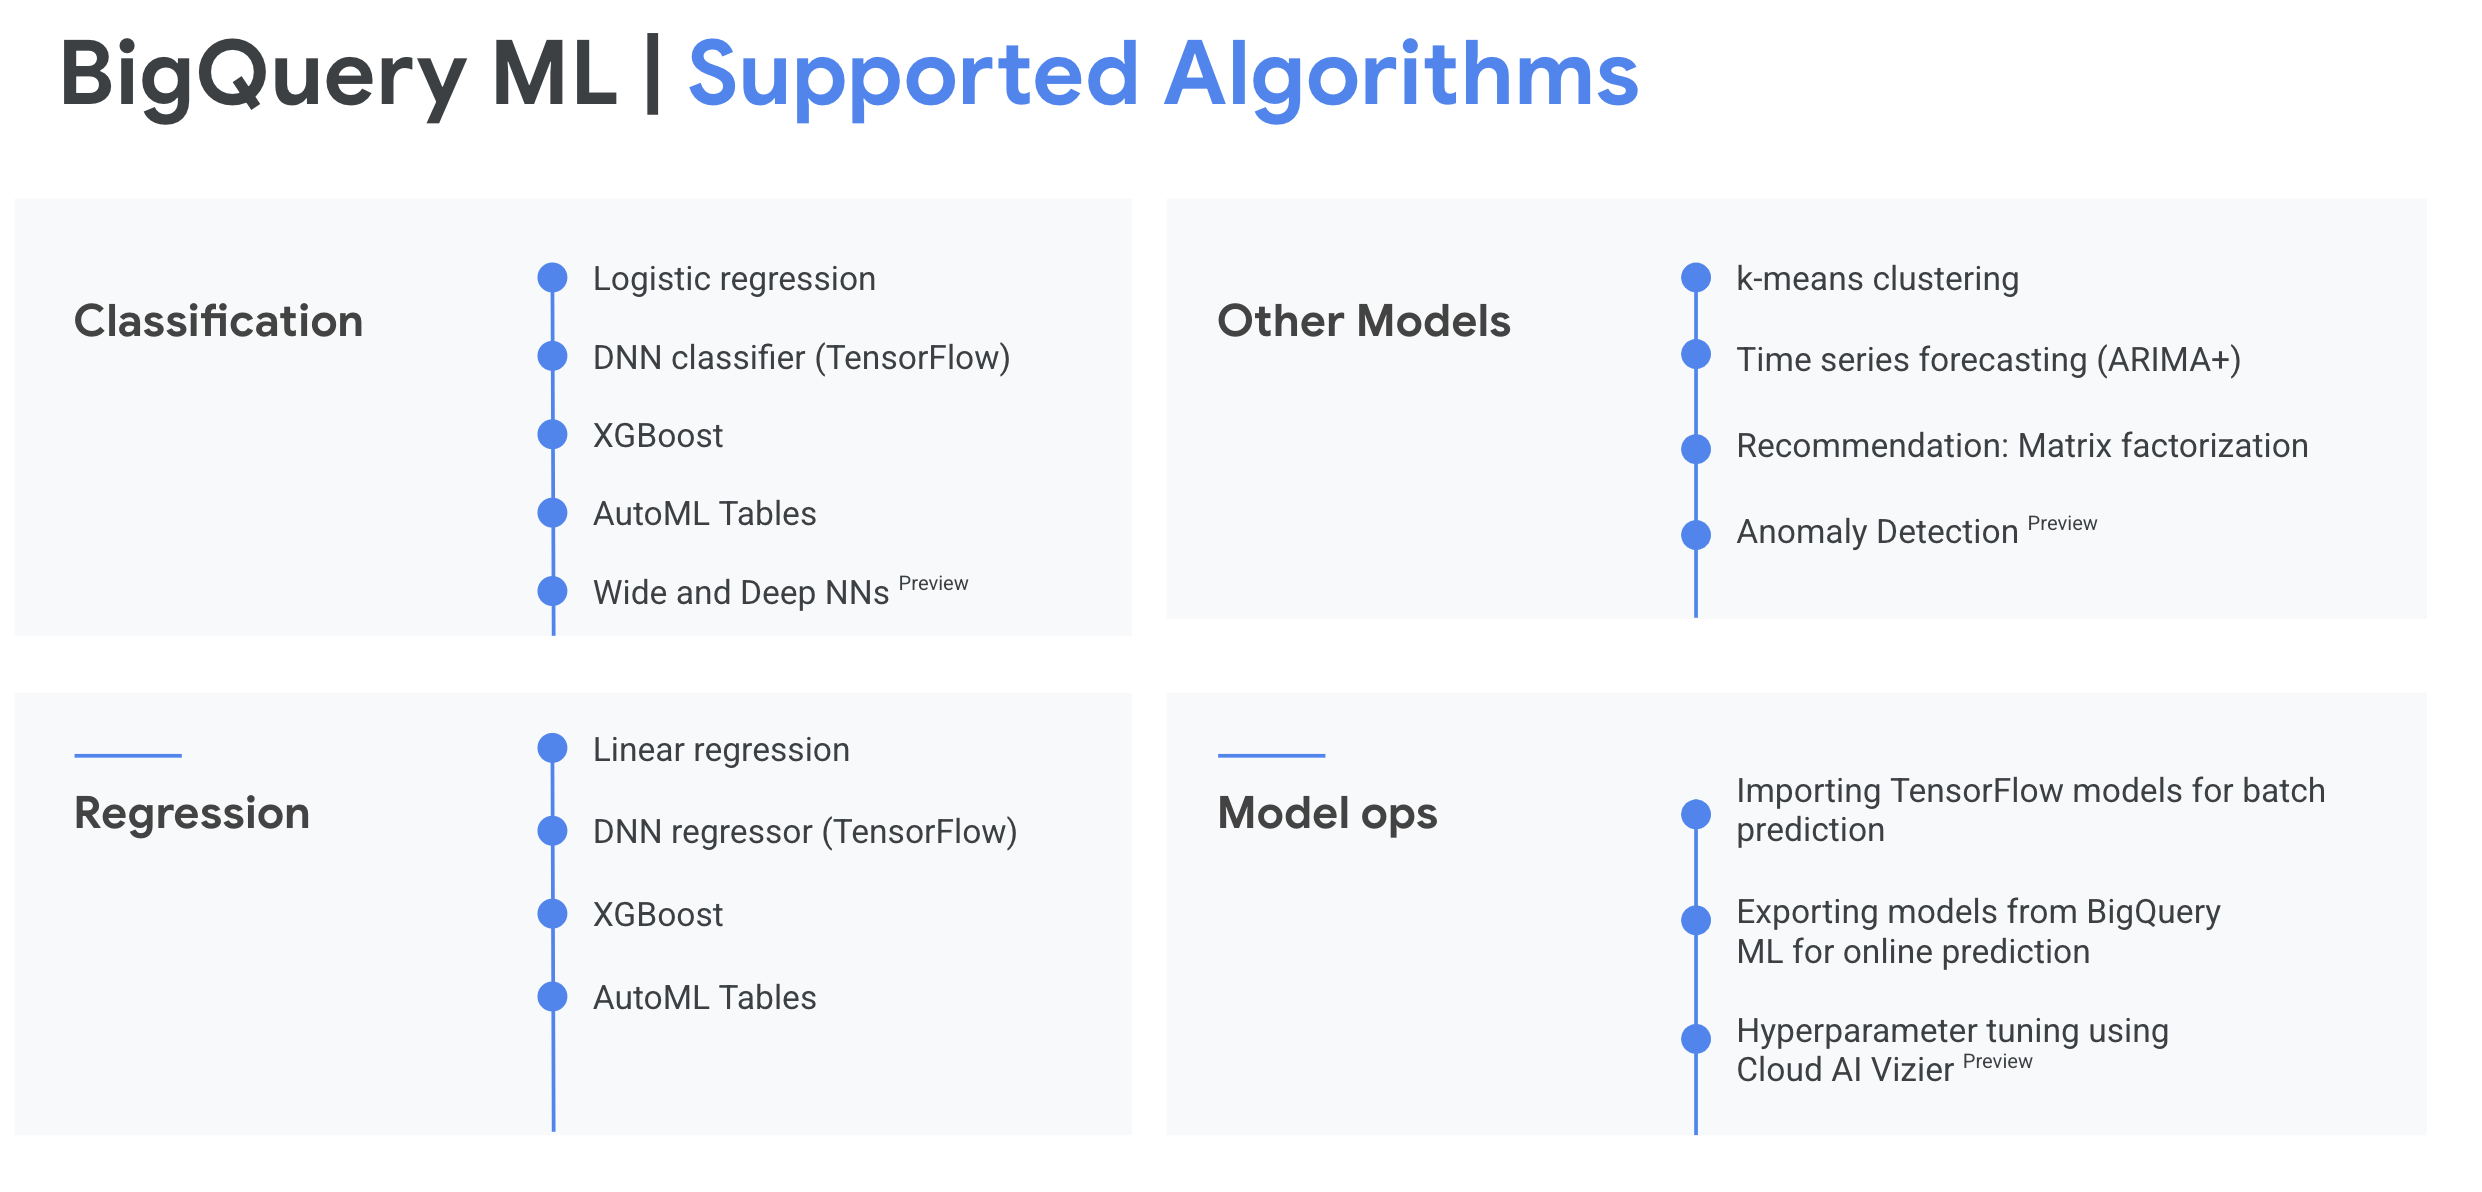